___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [2]:
df0 = pd.read_csv("store_sharing.csv")
df = df0.copy()
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [3]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [4]:
df.duplicated().value_counts()

False    17414
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

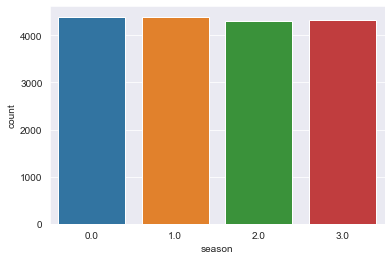

In [5]:
# season
sns.countplot(x=df['season']);


In [6]:
df.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

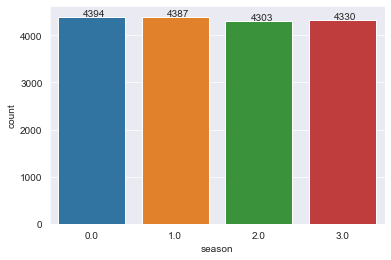

In [7]:
fig, ax = plt.subplots()
sns.countplot(x=df['season']);

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+10));

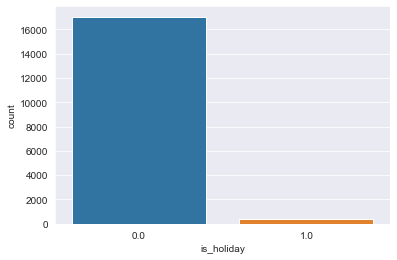

In [8]:
# is_holiday
sns.countplot(x=df['is_holiday']);

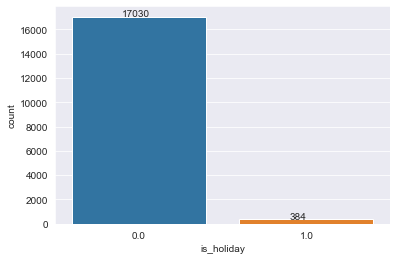

In [9]:
fig, ax = plt.subplots()
sns.countplot(x=df['is_holiday']);

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+10));

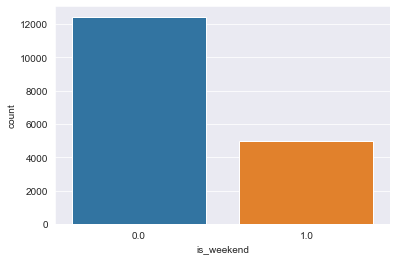

In [10]:
# is_weekend
sns.countplot(x=df["is_weekend"]);

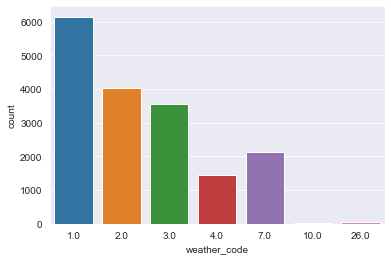

In [11]:
# weather_code
sns.countplot(x=df["weather_code"]);

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [13]:
type(df["timestamp"][0])

str

In [14]:
df.timestamp = pd.to_datetime(df.timestamp)

In [15]:
df.timestamp

0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: datetime64[ns]

In [16]:
df.set_index("timestamp", inplace = True)
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


In [17]:
df.index.min()

Timestamp('2015-01-04 00:00:00')

In [18]:
df.index.max()

Timestamp('2017-01-03 23:00:00')

In [19]:
df.index.max() - df.index.min()

Timedelta('730 days 23:00:00')

- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [20]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


In [21]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

In [22]:
df.index.year

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='timestamp', length=17414)

In [23]:
f = lambda x: x.strftime("%Y-%m")

In [24]:
df["year_month"] = f(df.index)
df["year"] = df.index.year
df["month"] = df.index.month
df["day_of_month"] = df.index.day
df["day_of_week"] = df.index.dayofweek
df["hour"] = df.index.hour



In [25]:
df.sample()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-08-22 23:00:00,1144,21.0,21.0,69.0,18.5,1.0,0.0,1.0,1.0,2015-08,2015,8,22,5,23


### 7.Visualize the correlation with a heatmap

<AxesSubplot:>

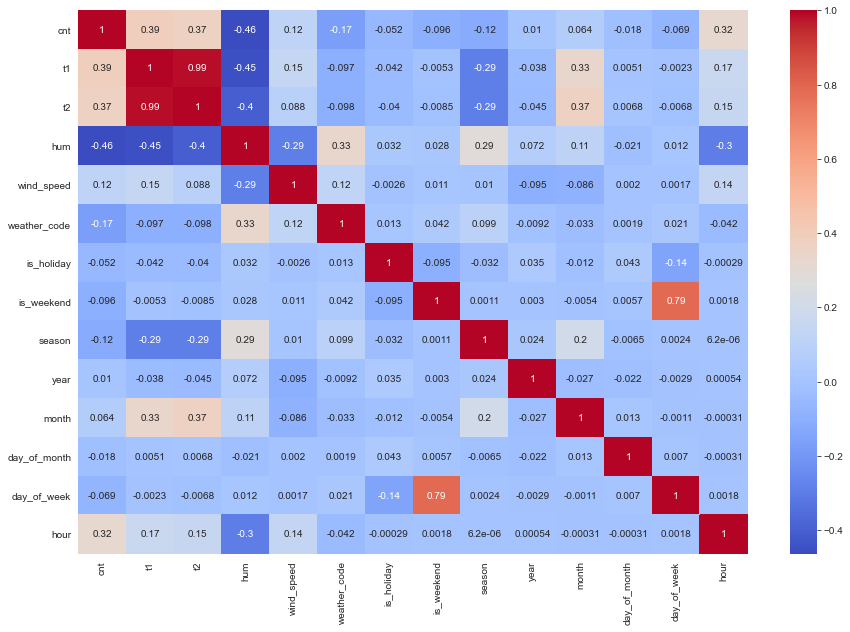

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [27]:
df_corr_cnt = df.corr()[["cnt"]].sort_values(by='cnt', ascending=False)
df_corr_cnt

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hour,0.324423
wind_speed,0.116295
month,0.063757
year,0.010046
day_of_month,-0.017887
is_holiday,-0.051698
day_of_week,-0.068688


<AxesSubplot:>

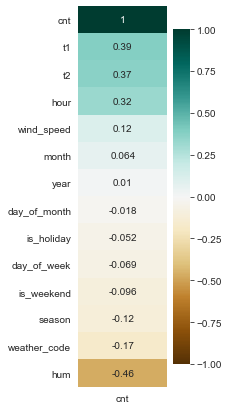

In [28]:
plt.figure(figsize=(2,7))
sns.heatmap(df_corr_cnt, annot=True, cmap="BrBG", vmin=-1, vmax=1)

### 8. Visualize the correlation of the target variable and the other features with barplot

<AxesSubplot:>

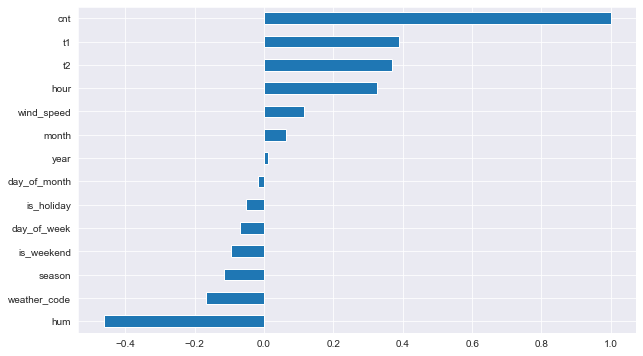

In [29]:
#with pandas
plt.figure(figsize=(10,6))
df.corr()["cnt"].sort_values().plot.barh()

### 9.Plot bike shares over time use lineplot

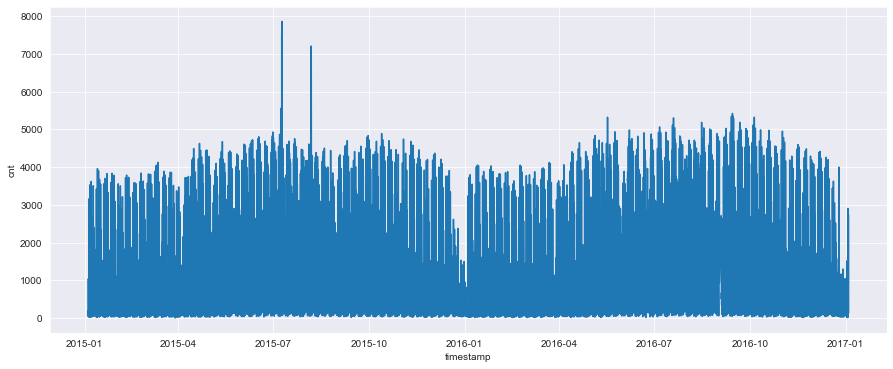

In [30]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df, x=df.index, y="cnt");

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [31]:
df_sum = df.groupby("year_month").cnt.sum()
df_sum

year_month
2015-01     546639
2015-02     543594
2015-03     695934
2015-04     831582
2015-05     895413
2015-06    1033252
2015-07    1120687
2015-08    1033951
2015-09     892478
2015-10     865046
2015-11     677332
2015-12     602838
2016-01     582518
2016-02     592910
2016-03     656527
2016-04     768845
2016-05    1001935
2016-06     933878
2016-07    1165527
2016-08    1137314
2016-09     998619
2016-10     935706
2016-11     703859
2016-12     651908
2017-01      37680
Name: cnt, dtype: int64

In [32]:
df_sum.index

Index(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01'],
      dtype='object', name='year_month')

In [33]:
df_sum.values

array([ 546639,  543594,  695934,  831582,  895413, 1033252, 1120687,
       1033951,  892478,  865046,  677332,  602838,  582518,  592910,
        656527,  768845, 1001935,  933878, 1165527, 1137314,  998619,
        935706,  703859,  651908,   37680], dtype=int64)

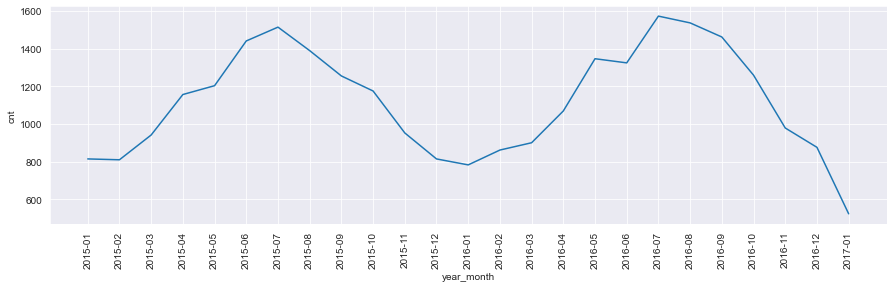

In [34]:
plt.figure(figsize=(15,4))
sns.lineplot(data = df, x="year_month", y="cnt", ci=None); 
plt.ticklabel_format(style="plain", axis="y")
plt.xticks(rotation=90);


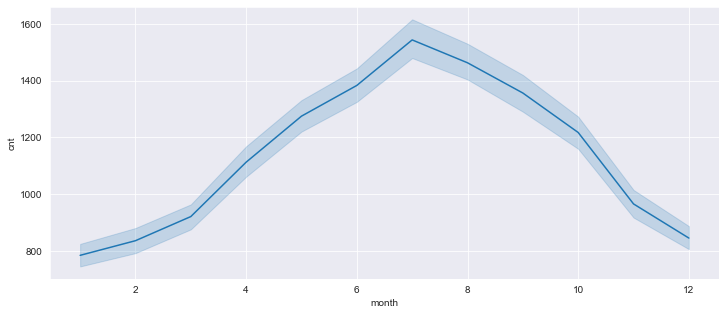

In [35]:
plt.figure(figsize=(12,5))
sns.lineplot(data = df, x="month", y="cnt"); 


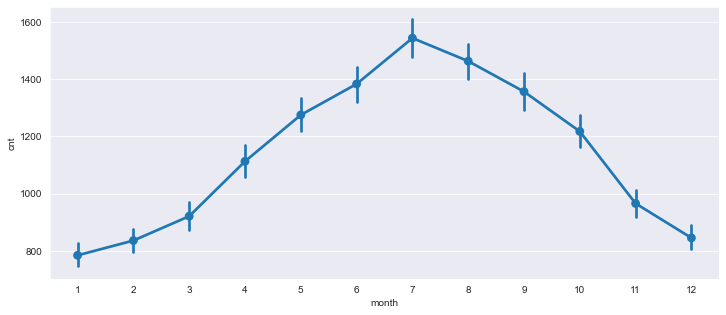

In [36]:
# with pointplot
plt.figure(figsize=(12,5))
sns.pointplot(data = df, x="month", y="cnt"); 

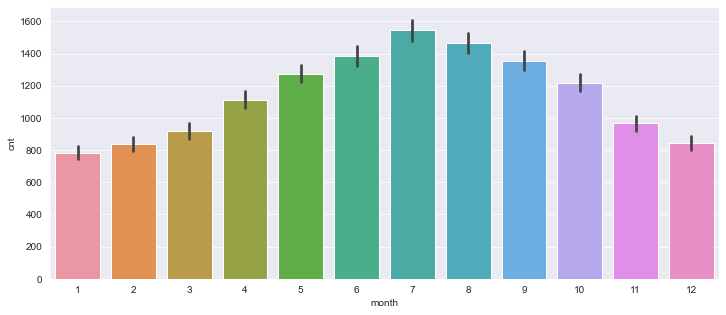

In [37]:
# with barplot
plt.figure(figsize=(12,5))
sns.barplot(data = df, x="month", y="cnt"); 

### 11.Plot bike shares by hours on (holidays, weekend, season)

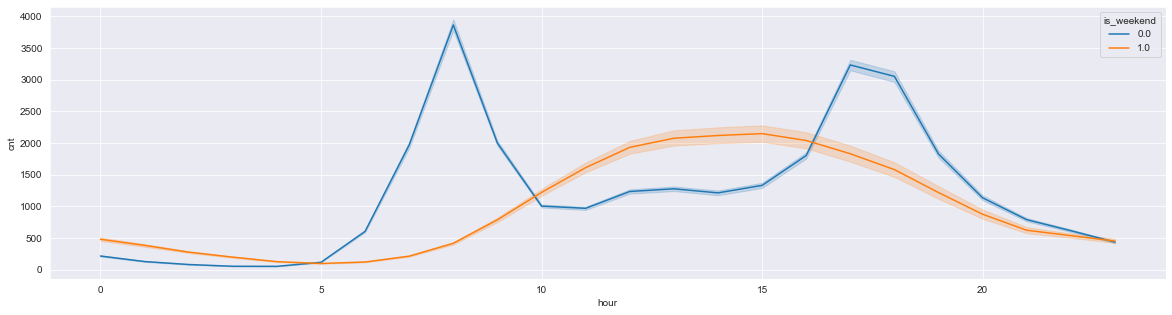

In [38]:
plt.figure(figsize=(20,5))
sns.lineplot(data = df, x="hour", y="cnt",hue="is_weekend"); 

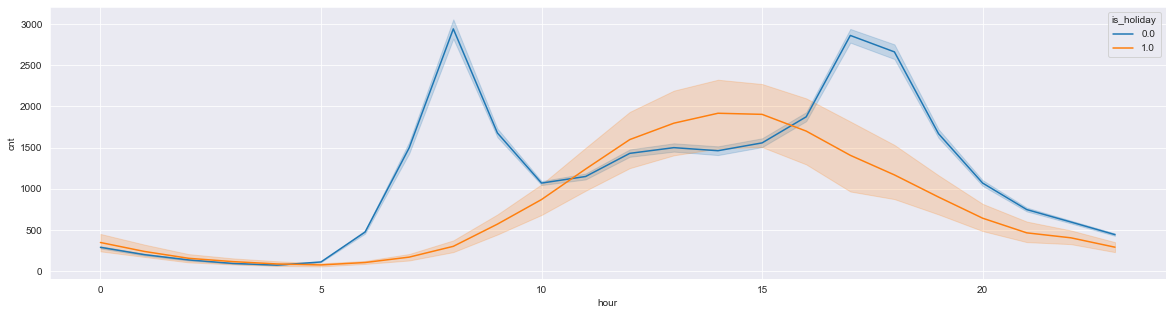

In [39]:
# with lineplot (*whether it is a holiday or not*)
plt.figure(figsize=(20,5))
sns.lineplot(data = df, x="hour", y="cnt",hue="is_holiday"); 

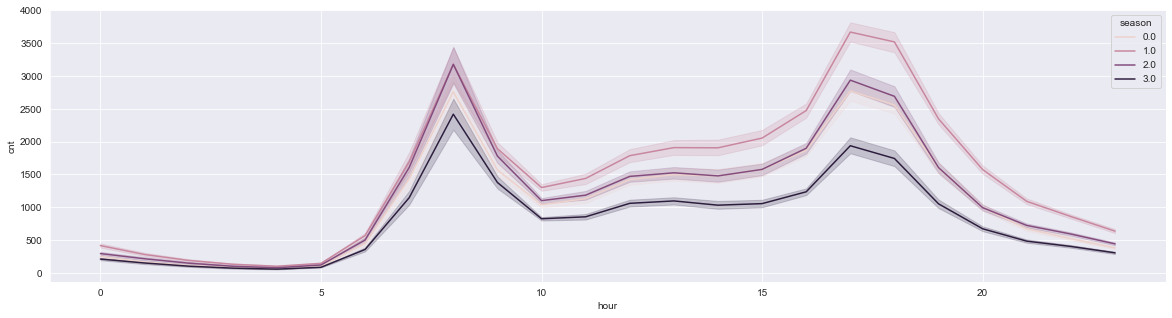

In [40]:
# with lineplot (*You may want to see seasonal breakdowns*)
plt.figure(figsize=(20,5))
sns.lineplot(data = df, x="hour", y="cnt",hue="season"); 

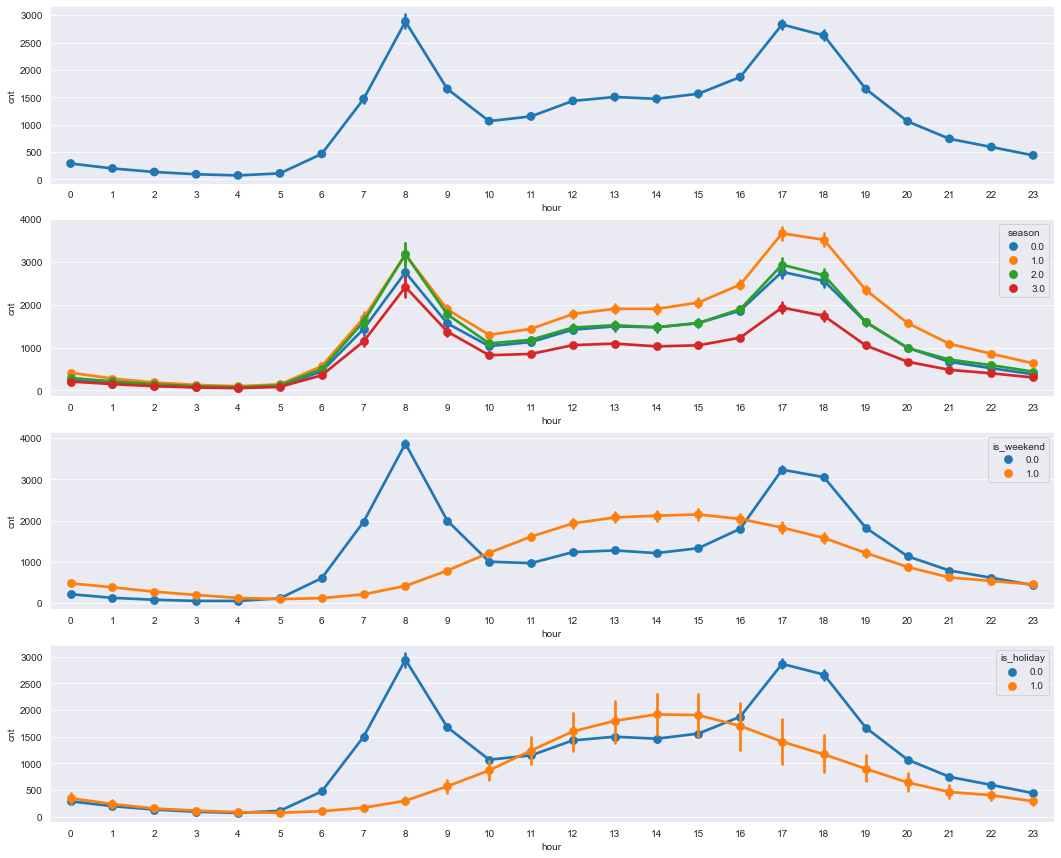

In [41]:
# with pointplot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(18,15))
sns.pointplot(data=df, x="hour", y="cnt", ax=ax1);
sns.pointplot(data=df, x="hour", y="cnt", hue="season", ax=ax2)
sns.pointplot(data=df, x="hour", y="cnt", hue="is_weekend", ax=ax3)
sns.pointplot(data=df, x="hour", y="cnt", hue="is_holiday", ax=ax4);

### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

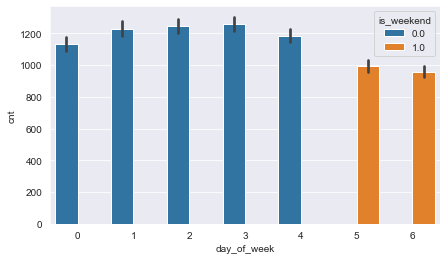

In [42]:
# with barplot
plt.figure(figsize=(7,4))
sns.barplot(data=df, x="day_of_week", y="cnt", hue="is_weekend");

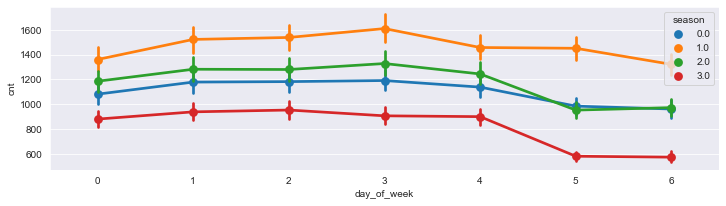

In [43]:
plt.figure(figsize=(12,3))
sns.pointplot(data=df, x="day_of_week", y="cnt", hue="season");

### 13.Plot bike shares by day of month

In [44]:
pd.DataFrame(df.groupby("day_of_month")["cnt"].mean().apply((lambda x : round(x)))).T

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,...,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,...,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


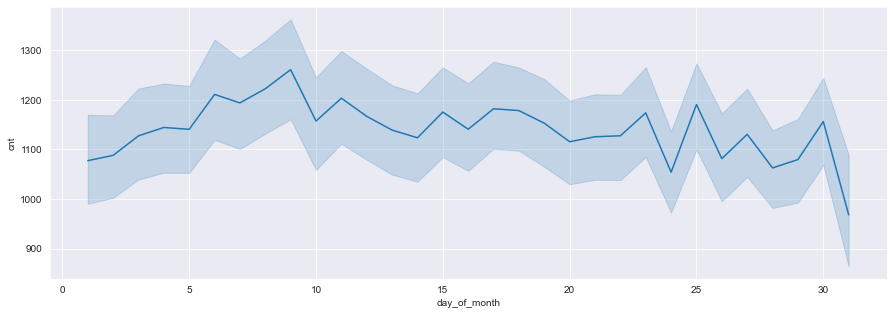

In [45]:
#with lineplot
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x="day_of_month", y="cnt")
pd.DataFrame(df.groupby("day_of_month")["cnt"].mean().apply((lambda x : round(x)))).T


### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

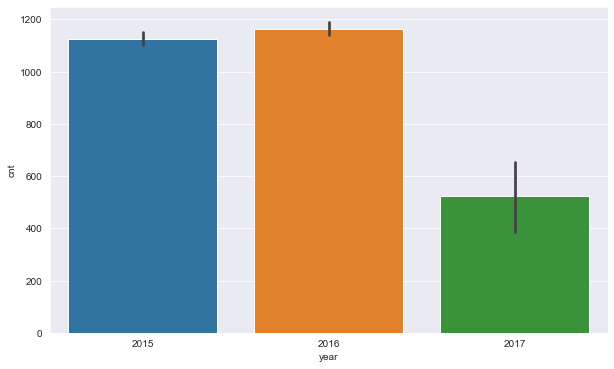

In [46]:
# with barplot year
plt.figure(figsize=(10,6))
sns.barplot(x="year", y="cnt", data=df);

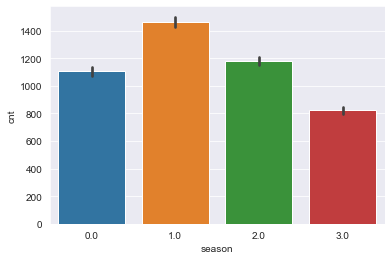

In [47]:
# with barplot season
sns.barplot(x="season", y="cnt", data=df);

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [48]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

In [49]:
df.is_weekend.value_counts().values

array([12444,  4970], dtype=int64)

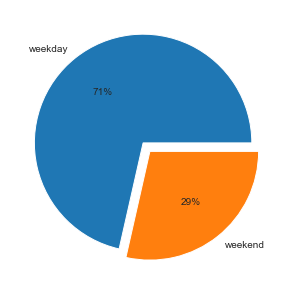

In [50]:
fig, ax = plt.subplots(figsize=(5,5))
explode=(0,0.1)
ax.pie(x=df.is_weekend.value_counts().values,
      labels=['weekday', 'weekend'],
      autopct='%1.f%%',
      explode=explode 
      )
plt.show()

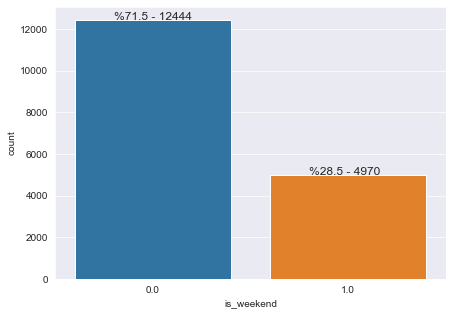

In [51]:
fig, ax = plt.subplots(figsize=(7,5))
axx = sns.countplot(x='is_weekend',data=df)

for bar in ax.patches:
    ax.annotate("%" + str(round(100*bar.get_height()/len(df), 1)) + ' - ' + str(bar.get_height() ),
               (bar.get_x() + 0.2, bar.get_height()+10),
               size=12)

### 16.Plot the distribution of weather code by seasons

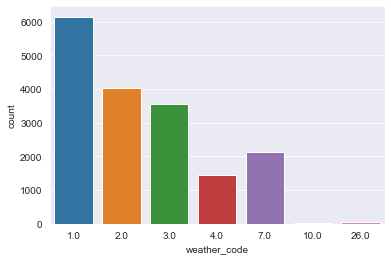

In [52]:
# with countplot
sns.countplot(x='weather_code', data=df);

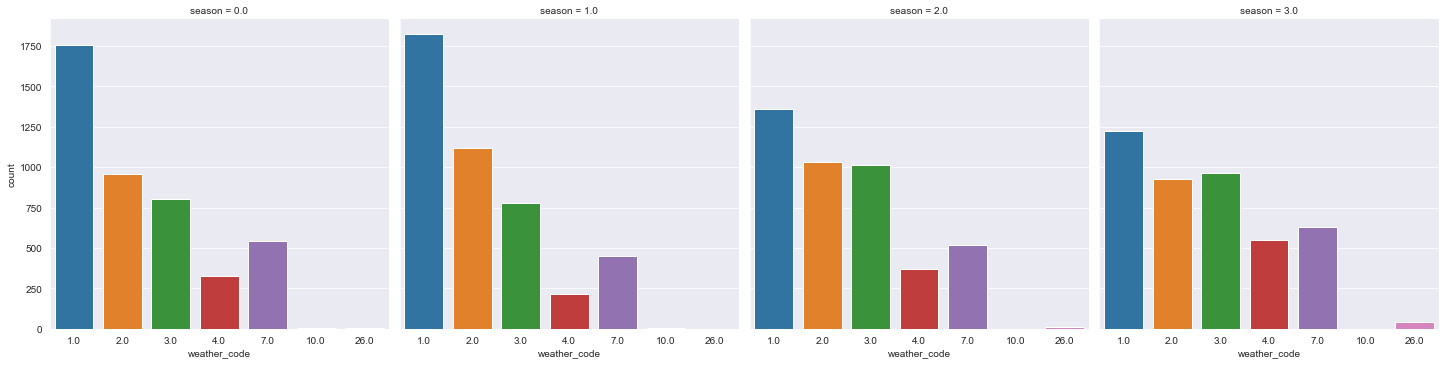

In [53]:
# with catplot
sns.catplot(x='weather_code', data=df, col="season", kind="count");

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___